# Quantium Virtual Internship
## Notebook 2

## The task
We need to analyse the data to understand current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

### Datasets:  
QVI_purchase_behaviour.csv  
QVI_transaction_data.xlsx

# Explore sales

Our insights need to have a commercial application as our end goal is to form a strategy based on the findings to provide a clear recommendation to the Category Manager. 

## Data analysis and customer segments 
Define metrics:  
- total sales  
- drivers of sales  
- where the highest sales are coming from

Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of the report.

Deep dive into customer segments – define your recommendation from your insights, 
- determine which segments should be targeted  
- are packet sizes relative?  
- form an overall conclusion  

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('magma')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('data/clean_quantium_transaction_data.csv')
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,weight_bin,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,160-175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,160-175g,CCs


In [3]:
df.shape

(249668, 11)

## Pack sizes

In [5]:
# pack sizes vary from 70g-380g
# most popular are mid range sizes 160g-175g
print(df['weight'].describe())
print(df['weight_bin'].describe())

count    249668.000000
mean        175.283488
std          59.146755
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: weight, dtype: float64
count       249668
unique           4
top       160-175g
freq        104640
Name: weight_bin, dtype: object


<AxesSubplot:ylabel='Frequency'>

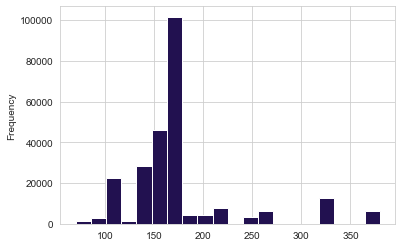

In [6]:
df['weight'].plot.hist(bins=20)

In [8]:
df['weight_bin'].unique()

array(['160-175g', '125-150g', '180-380g', '70-110g'], dtype=object)

In [9]:
# define categorical values order
list_ordering = ['70-110g', '125-150g', '160-175g', '180-380g']  
df['weight_bin'] = pd.Categorical(df['weight_bin'], categories=list_ordering) 

In [10]:
df['weight_bin'].value_counts(normalize=True).sort_index()*100

70-110g     10.775109
125-150g    29.216399
160-175g    41.911659
180-380g    18.096833
Name: weight_bin, dtype: float64

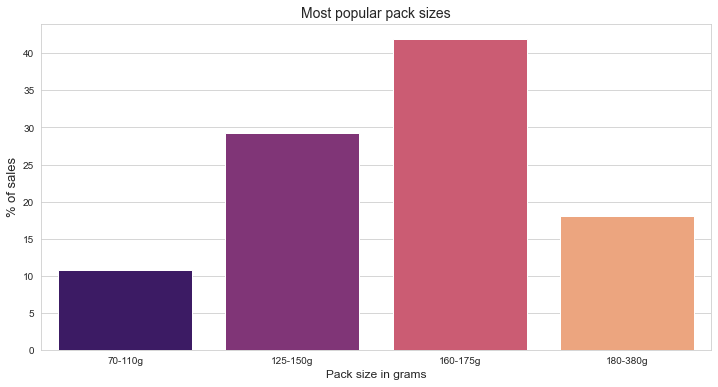

In [11]:
# most popular pack sizes by weight bins
plt.figure(figsize=(12,6))

q = df['weight_bin'].value_counts(normalize=True).sort_index()*100
y = q.values
x = q.index

sns.barplot(x=x, y=y, palette='magma')

plt.xlabel('Pack size in grams', fontsize=12)
plt.ylabel('% of sales', fontsize=13)
plt.title('Most popular pack sizes', fontsize=14);

## Most popular brands

Most popular brands overall are Kettle, Smiths, Doritos and Pringles in total appearing in 50% of transactions.

In [38]:
brand_counts = pd.DataFrame(df['brand'].value_counts(normalize=True)*100)
brand_counts = brand_counts.round(1)

In [66]:
# plotly gender by clusters
data = brand_counts
fig = px.bar(data, 
             x= data.values.round(1), 
             y= data.index,
#              color_continuous_scale='Pastel1',
             color_discrete_sequence=['#c95a8b'],
             title='Most popular brands',
             labels={'x':'%', 'index':'Brand'},
             template = 'simple_white')

fig.show()

In [69]:
brand_counts.head(4).sum()

50.06688882836407

# Sales from brands

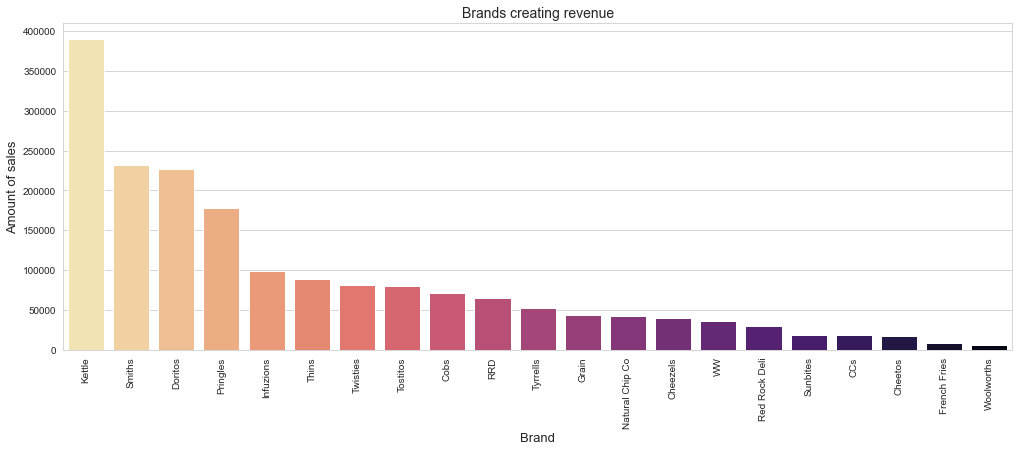

In [75]:
# which brand makes the most money?
plt.figure(figsize=(17,6))

df_items = df[['brand', 'TOT_SALES']]
df_items_sum = df_items.groupby('brand').sum().sort_values(['TOT_SALES'],ascending=False)

x = df_items_sum.index.to_series()
y = df_items_sum['TOT_SALES']

sns.barplot(x=x, y=y, palette='magma_r')
plt.xticks(rotation=90)
plt.xlabel('Brand', fontsize=13)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Brands creating revenue', fontsize=14);

## Average sale per brand
total sum / qty

In [84]:
num_sold = df[['brand', 'PROD_QTY']]
num_sold_sum = num_sold.groupby('brand').sum().sort_values(['PROD_QTY'],ascending=False)

In [85]:
brand_sold_items = df_items_sum.merge(num_sold_sum, on='brand')

In [91]:
brand_sold_items['avg'] = brand_sold_items['TOT_SALES']/brand_sold_items['PROD_QTY']
brand_avg = brand_sold_items.round(2).sort_values('avg', ascending=False)

<AxesSubplot:xlabel='brand'>

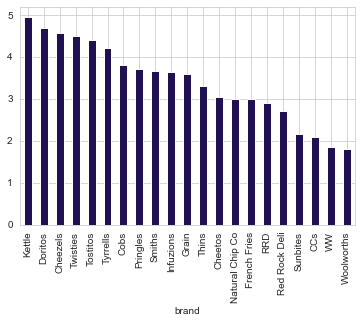

In [97]:
brand_avg['avg'].plot.bar()

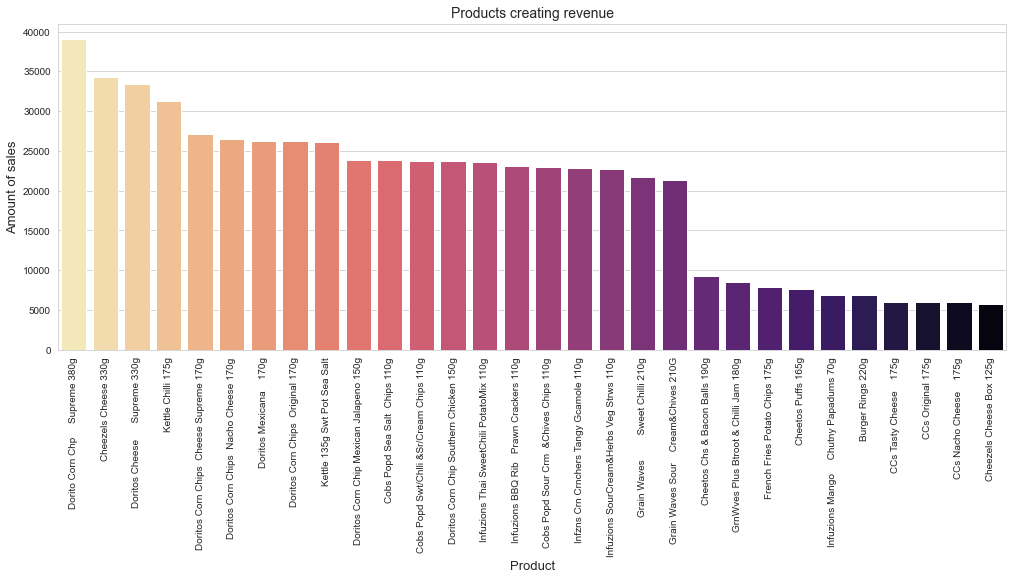

In [99]:
# which product makes the most money?
plt.figure(figsize=(17,6))

df_items = df[['PROD_NAME', 'TOT_SALES']]
df_items_sum = df_items.groupby('PROD_NAME').sum().head(30).sort_values(['TOT_SALES'],ascending=False)

x = df_items_sum.index.to_series()
y = df_items_sum['TOT_SALES']

sns.barplot(x=x, y=y, palette='magma_r')
plt.xticks(rotation=90)
plt.xlabel('Product', fontsize=13)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Products creating revenue', fontsize=14);

# Customer data

Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is  
How many customers are in each segment  
How many chips are bought per customer by segment  
What's the average chip price by customer segment  

In [100]:
df2 = pd.read_csv('data/QVI_purchase_behaviour.csv')
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [101]:
df2.shape

(72637, 3)

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [103]:
df2['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [104]:
df2['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

## Combine customer and transaction data

In [105]:
comb = df.merge(df2)

In [107]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249668 entries, 0 to 249667
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   DATE              249668 non-null  object  
 1   STORE_NBR         249668 non-null  int64   
 2   LYLTY_CARD_NBR    249668 non-null  int64   
 3   TXN_ID            249668 non-null  int64   
 4   PROD_NBR          249668 non-null  int64   
 5   PROD_NAME         249668 non-null  object  
 6   PROD_QTY          249668 non-null  int64   
 7   TOT_SALES         249668 non-null  float64 
 8   weight            249668 non-null  int64   
 9   weight_bin        249668 non-null  category
 10  brand             249668 non-null  object  
 11  LIFESTAGE         249668 non-null  object  
 12  PREMIUM_CUSTOMER  249668 non-null  object  
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 25.0+ MB


## How many customers in different lifestages

In [282]:
ls_prem = comb.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).count()['DATE'].reset_index().rename(columns={'DATE':'count_prem'}).sort_values('count_prem', ascending=False)
ls_prem.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,count_prem
6,OLDER FAMILIES,Budget,21808
13,RETIREES,Mainstream,20202


In [285]:
ls_total = ls_prem.groupby('LIFESTAGE').sum().reset_index().rename(columns={'count_prem':'ls_total'})
ls_total.sort_values('ls_total', ascending=False)

,LIFESTAGE,ls_total
3,OLDER SINGLES/COUPLES,51363
4,RETIREES,46934
2,OLDER FAMILIES,45765
5,YOUNG FAMILIES,41035
6,YOUNG SINGLES/COUPLES,34309
0,MIDAGE SINGLES/COUPLES,23700
1,NEW FAMILIES,6562


In [286]:
ls_prem = ls_prem.merge(ls_total, on='LIFESTAGE')
ls_prem.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,count_prem,ls_total
0,OLDER FAMILIES,Budget,21808,45765
1,OLDER FAMILIES,Mainstream,13411,45765


In [287]:
# plotly why_this by clusters
data = ls_prem
fig = px.bar(data, 
             x= 'LIFESTAGE', 
             y= 'count_prem', 
             color_discrete_sequence= px.colors.sequential.Sunsetdark_r,
             title='Customer premiums in lifestages',
             hover_data=ls_prem.groupby('LIFESTAGE').sum(), 
             labels={'LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium', 'count_prem':'Count', 'ls_total':'Total in lifestage'}, 
             barmode='group', 
             color=data['PREMIUM_CUSTOMER'], 
             template = 'simple_white')
fig.show()

## Lifestages consuming chips

There is a linear relationship between total sales and number of items bought.  
Chips most popular with Older singles/couples and least popular with New Families.  

In [197]:
combo_ls = comb[['LIFESTAGE', 'TOT_SALES', 'PROD_QTY']]
combo_ls_sum = combo_ls.groupby('LIFESTAGE').sum().sort_values(['TOT_SALES'],ascending=False).reset_index()
combo_ls_sum[['LIFESTAGE', 'TOT_SALES']].round()

,LIFESTAGE,TOT_SALES
0,OLDER SINGLES/COUPLES,378884.0
1,RETIREES,344887.0
2,OLDER FAMILIES,331644.0
3,YOUNG FAMILIES,297396.0
4,YOUNG SINGLES/COUPLES,245307.0
5,MIDAGE SINGLES/COUPLES,174010.0
6,NEW FAMILIES,47656.0


In [184]:
# plotly lifestage sales
data = combo_ls_sum
fig = px.bar(data, 
             x= combo_ls_sum['LIFESTAGE'], 
             y= combo_ls_sum['TOT_SALES'].round(),
#              color_continuous_scale='Pastel1',
             color_discrete_sequence=['#c95a8b'],
             title='Sales by lifestage',
             labels={'x':'Lifestage', 'y':'Sales'},
             template = 'simple_white')

fig.show()

In [198]:
# plotly lifestage sales
data = combo_ls_sum
fig = px.scatter(data, 
             x= combo_ls_sum['TOT_SALES'].round(), 
             y= combo_ls_sum['PROD_QTY'], 
             color = combo_ls_sum['LIFESTAGE'],
             size = (combo_ls_sum['TOT_SALES']/combo_ls_sum['PROD_QTY']).round(1),
#              color_continuous_scale='Pastel1',
#              color_discrete_sequence=['#c95a8b'],
             title='Sales and quantity by lifestage',
             labels={'x':'Sales', 'PROD_QTY':'Count', 'size':'Avg sale'},
             template = 'simple_white')

fig.show()

## Lifestage average quantities bought in a transaction

In [204]:
comb.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,weight_bin,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,160-175g,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,160-175g,CCs,MIDAGE SINGLES/COUPLES,Budget


In [209]:
combo_prem = comb[['PREMIUM_CUSTOMER', 'TOT_SALES', 'PROD_QTY']]

In [211]:
combo_prem.groupby('PREMIUM_CUSTOMER').sum().sort_values(['PROD_QTY'],ascending=False).reset_index()

,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY
0,Mainstream,706252.50,182813
1,Budget,636632.85,167747
2,Premium,476899.05,125351


In [217]:
combo_pm.groupby(['PREMIUM_CUSTOMER', 'weight_bin']).sum()

TOT_SALES
PREMIUM_CUSTOMER weight_bin           
Budget           70-110g      61721.00
                 110-150g    178868.20
                 150-175g    263054.70
                 175-380g    132988.95
Mainstream       70-110g      70553.30
                 110-150g    200511.40
                 150-175g    285392.00
                 175-380g    149795.80
Premium          70-110g      47019.50
                 110-150g    134387.80
                 150-175g    195671.90
                 175-380g    101119.85

<Figure size 864x432 with 0 Axes>

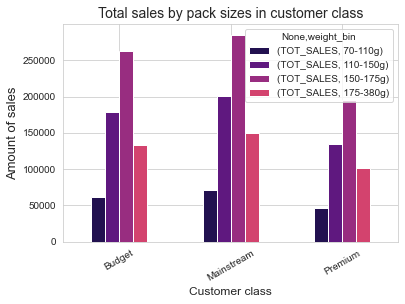

In [242]:
plt.figure(figsize=(12,6))
combo_pm.groupby(['PREMIUM_CUSTOMER', 'weight_bin']).sum().unstack().plot.bar()

plt.xlabel('Customer class', fontsize=12)
plt.xticks(rotation=30)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Total sales by pack sizes in customer class', fontsize=14);

In [227]:
combo_pm_sum = combo_pm.groupby(['PREMIUM_CUSTOMER', 'weight_bin']).sum().unstack(fill_value=0)
combo_pm_sum

TOT_SALES                               
weight_bin        70-110g   110-150g  150-175g   175-380g
PREMIUM_CUSTOMER                                         
Budget             61721.0  178868.2  263054.7  132988.95
Mainstream         70553.3  200511.4  285392.0  149795.80
Premium            47019.5  134387.8  195671.9  101119.85

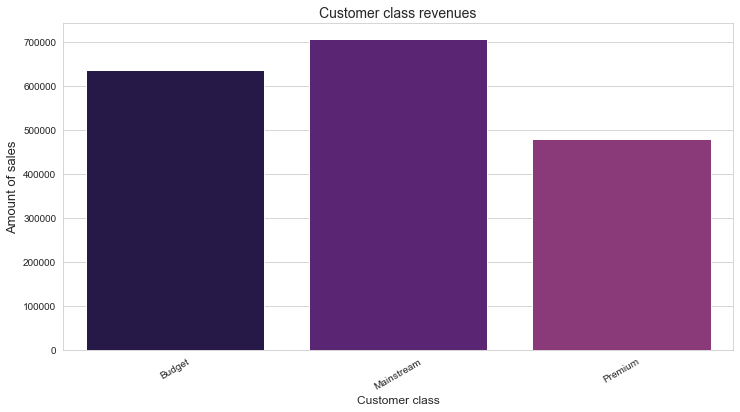

In [208]:
# most popular pack sizes for different customer classes
plt.figure(figsize=(12,6))

combo_pm = comb[['PREMIUM_CUSTOMER', 'TOT_SALES', 'weight_bin']]
combo_pm_sum = combo_pm.groupby('PREMIUM_CUSTOMER').sum()

x = combo_pm_sum.index.to_series()
y = combo_pm_sum['TOT_SALES']

sns.barplot(x=x, y=y) #, palette='magma_r'
# sns.catplot(x=x, y=y, hue=combo_pm['weight_bin'], kind="bar")

plt.xlabel('Customer class', fontsize=12)
plt.xticks(rotation=30)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Customer class revenues', fontsize=14);